In [ ]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

0.006779193878173828


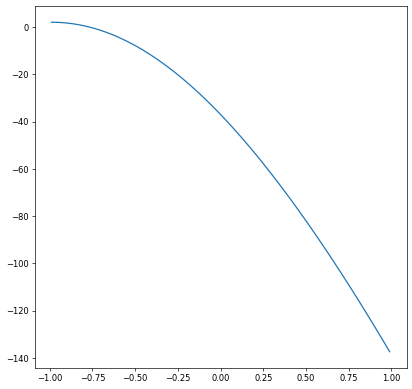

0.0


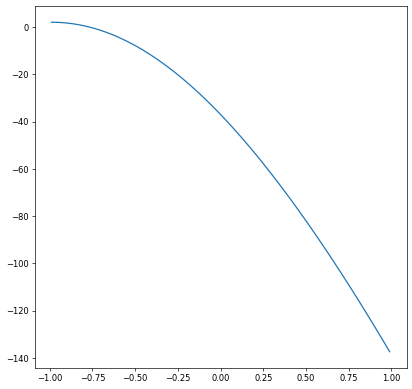

0.19393939393939394


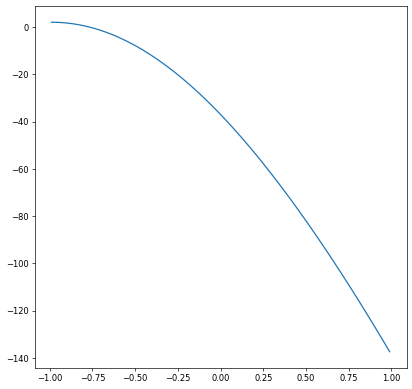

0.3878787878787879


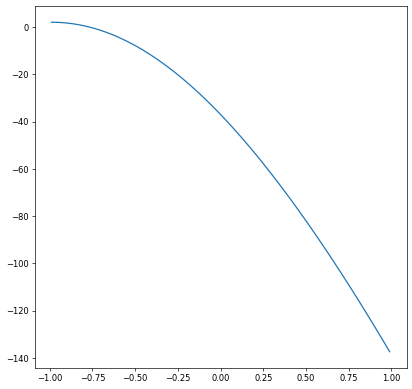

0.5818181818181818


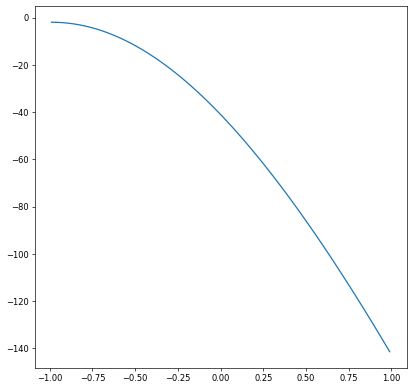

0.7757575757575758


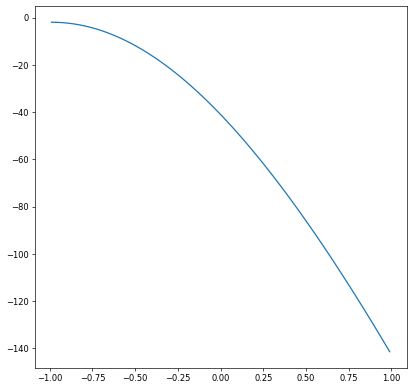

0.9696969696969697


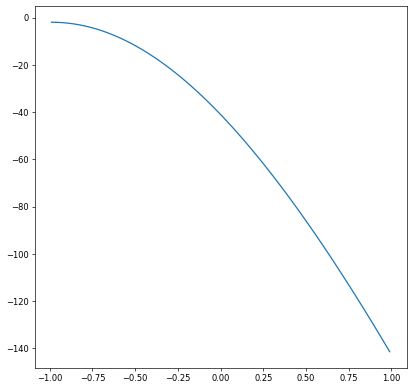

1.1636363636363636


<Figure size 1080x840 with 0 Axes>

In [11]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline

N = 100
xmax = 1
xmin = -1
x = np.linspace(xmin, xmax, N+1)
N_t = 100
t = np.linspace(0, 1.2, N_t)

xc = 0.5*np.array(x[:-1]+x[1:])

dx = x[1] - x[0]

u0 = 2*np.heaviside(-xc, 0) - 2*np.heaviside(xc, 0)

start = time.time()  

def gen_minmod(a, b, c):
  th = 1
  maximum = np.maximum(th*a, np.maximum(b, th*c))
  minimum = np.minimum(th*a, np.minimum(b, th*c))
  hs_pos = np.heaviside(a, 1)*np.heaviside(b, 1)*np.heaviside(c, 1)
  hs_neg = np.heaviside(-a, 1)*np.heaviside(-b, 1)*np.heaviside(-c, 1)
  return minimum*hs_pos + maximum*hs_neg

def minmod(a, b):
  minmod = (np.abs(a) < np.abs(b)).astype(int)
  minmod2 = (np.abs(b) < np.abs(a)).astype(int)
  return 1/2*(np.sign(a) + np.sign(b))*(minmod*np.abs(a) + minmod2*np.abs(b)) 

def dudt(u, t):
  #global time, blue, yellow, green, red, purple
  u = np.append(2, np.append(u, -2)) 
  
  limiter = minmod((u[1:-1] - u[:-2])/dx, (u[2:] - u[1:-1])/dx)

  uLForw = u[0]
  uLCent = u[1:-1] + dx/2*limiter
  uL = np.append(uLForw, uLCent)
  
  uRBack = u[-1]
  uRCent = u[1:-1] - dx/2*limiter
  uR = np.append(uRCent, uRBack)

  FL = (uL**4 - 5*uL**2 + 4)/4
  FR = (uR**4 - 5*uR**2 + 4)/4
 
  FL_d = (4*uL**3 - 10*uL)/4
  FR_d = (4*uR**3 - 10*uR)/4
  
  prop = (np.abs(FL_d) >= np.abs(FR_d)).astype(int)*np.abs(FL_d) + (np.abs(FL_d) < np.abs(FR_d)).astype(int)*np.abs(FR_d)
    
  fu_interface = (FL + FR)/2 - prop/2*(uR - uL)
      
  dudt =  (fu_interface[:-1] - fu_interface[1:])/dx
  #time_.append(t), blue.append(fu_interface[8]), yellow.append( ((FL + FR)/2)[8] ), green.append( (- prop/2*(uR - uL))[8] )
  #red.append( prop[8] ), purple.append( uR[8] )
  return dudt

def solution(u0):
    """https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html"""
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='RK45') # explicit Runge Kutta
    return sol.y

sol = solution(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/6)):
    plt.figure(figsize=(8, 8), dpi= 60, facecolor='w', edgecolor='k')
    plt.plot(xc, sol[i])
    plt.show()
    print(t[i])

plt.figure(figsize=(18, 14), dpi= 60, facecolor='w', edgecolor='k')

plt.show()